# Generating MNIST Sequences

Faisal Qureshi    
faisal.qureshi@ontariotechu.ca

In [123]:
from importlib import reload
import os
import sys
import matplotlib.pyplot as plt
import torch
import numpy as np
import random

In [124]:
sys.path.insert(0, os.path.abspath('..'))
from ae import data

In [125]:
digits = data.Digits(datafolder='../datasets', digits='all')

In [126]:
#digits[0]

In [127]:
sorted, indices = torch.sort(input=digits.labels, dim=0, descending=False, stable=True)

In [128]:
starts = np.zeros(10, dtype=np.int32)-1
counts = np.zeros(10, dtype=np.int32)
for i in range(len(sorted)):
    ii = int(sorted[i].item())
    counts[ii] += 1
    if starts[ii] < 0:
        starts[ii] = i

In [129]:
starts

array([    0,  5923, 12665, 18623, 24754, 30596, 36017, 41935, 48200,
       54051], dtype=int32)

In [130]:
counts

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int32)

In [131]:
def sample_sequence(start_digit, seq_length):
    digits = np.empty(seq_length)
    increasing = True
    current = start_digit
    for i in range(seq_length):
        digits[i] = current
        if increasing: 
            if current < 9:
                current += 1
            else:
                increasing = False
                current -= 1
        else:
            if current > 0:
                current -= 1
            else:
                increasing = True
                current += 1
    
    return digits

In [132]:
seq = sample_sequence(start_digit, seq_length)
print(seq)

[8. 9. 8. 7. 6.]


In [133]:
starts

array([    0,  5923, 12665, 18623, 24754, 30596, 36017, 41935, 48200,
       54051], dtype=int32)

In [134]:
ends = starts+counts
ends

array([ 5923, 12665, 18623, 24754, 30596, 36017, 41935, 48200, 54051,
       60000], dtype=int32)

In [135]:
digits

In [136]:
def pick(digit, starts, counts):
    return random.randrange(counts[digit])+starts[digit]

12203


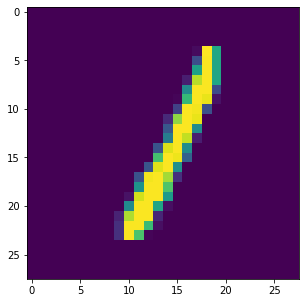

In [158]:
i = pick(1, starts, counts)
print(i)

plt.figure(figsize=(5,5))
plt.imshow(digits[indices[i]]['sample'].squeeze())

In [148]:
seq = sample_sequence(start_digit, seq_length).astype(np.int32)
ii = np.empty(len(seq), dtype=np.int32)
print(seq)
print(starts)
print(counts)
for i in range(len(seq)):
    print(seq[i])
    ii[i] = pick(seq[i], starts, counts)
print(ii)

[8 9 8 7 6]
[    0  5923 12665 18623 24754 30596 36017 41935 48200 54051]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
8
9
8
7
6
[48711 59082 52240 41950 37328]


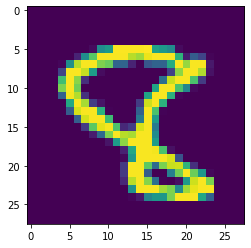

In [159]:
plt.imshow(digits[indices[ii[0]]]['sample'].squeeze())

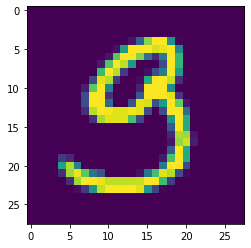

In [160]:
plt.imshow(digits[indices[ii[1]]]['sample'].squeeze())

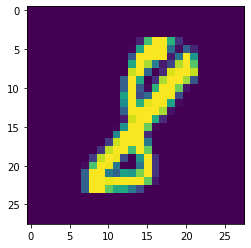

In [161]:
plt.imshow(digits[indices[ii[2]]]['sample'].squeeze())

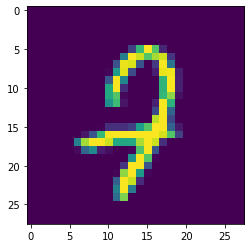

In [162]:
plt.imshow(digits[indices[ii[3]]]['sample'].squeeze())

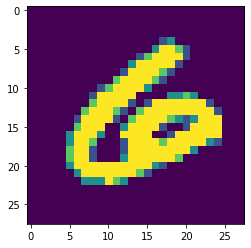

In [163]:
plt.imshow(digits[indices[ii[4]]]['sample'].squeeze())

In [173]:
seq1 = torch.zeros([5,1,28,28])

In [174]:
print(seq1.shape)

torch.Size([5, 1, 28, 28])


In [175]:
for i in range(len(ii)):
    seq1[i,0,:,:] = digits[indices[ii[i]]]['sample'].squeeze()

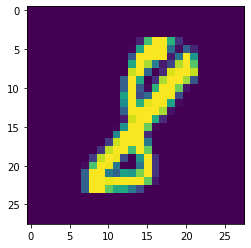

In [179]:
plt.imshow(seq1[2,0,:,:])